In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
def seg(image):
    img = image
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray,136,255,cv2.THRESH_BINARY)
    
    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
    ret, sure_fg = cv2.threshold(dist_transform,0.005*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)
    
    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    # Add one to all labels so that sure background is not 0, but 1
    markers = markers+1

    # Now, mark the region of unknown with zero
    markers[unknown==255] = 0
    
    markers = cv2.watershed(img,markers)
    img[markers == -1] = [255,0,0]
    
    #visualize the output result
    figure_size = 16
    plt.figure(figsize=(figure_size,14))
    plt.subplot(2,2,1),plt.imshow(image)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,2),plt.imshow(thresh)
    plt.title('Threshold Segmentation'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,3),plt.imshow(unknown)
    plt.title('Unknown Regions'), plt.xticks([]), plt.yticks([])
    plt.subplot(2,2,4),plt.imshow(markers)
    plt.title('Marker Image After Segmentation'), plt.xticks([]), plt.yticks([])
    plt.show()
    return img

In [3]:
def canny(img):
    figure_size = 16
    edges = cv2.Canny(img,150,600)
    plt.figure(figsize=(figure_size,figure_size))
    plt.subplot(1,2,1),plt.imshow(img1)
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
    plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    plt.show()

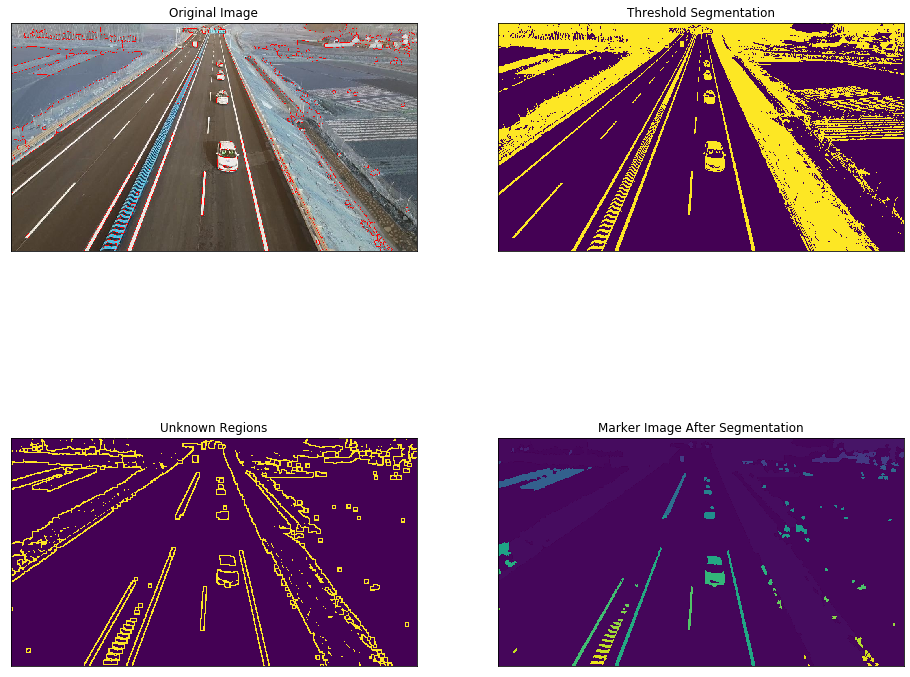

In [4]:
img1= cv2.imread("img/show.jpg")
res1= seg(img1)

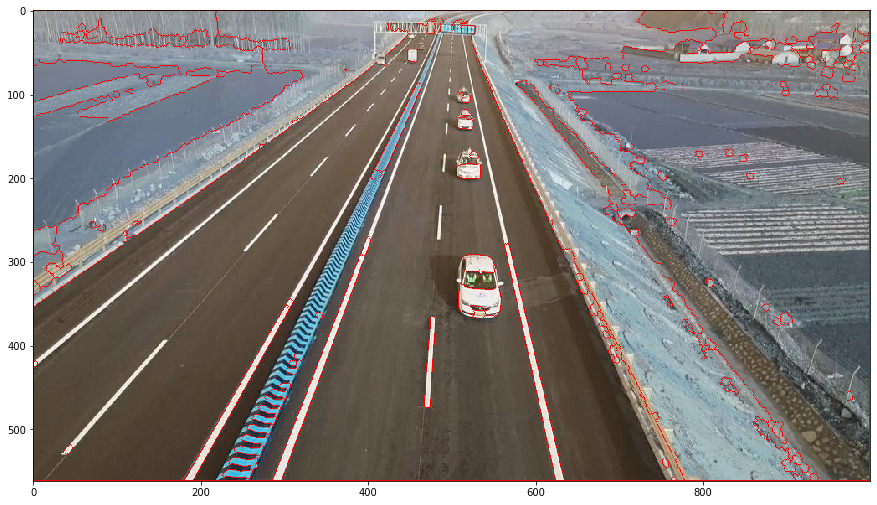

In [5]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(res1)

`Running Canny Edge Detection on result`

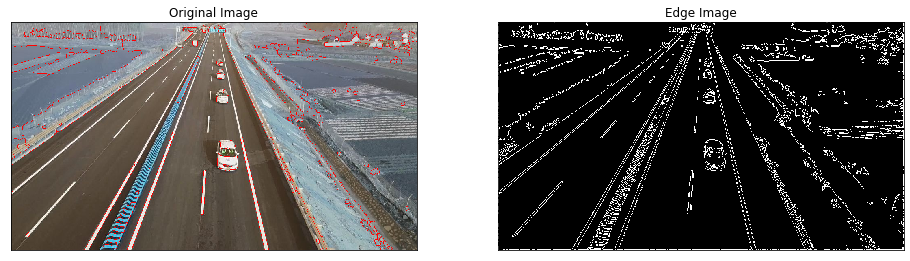

In [6]:
canny(res1)

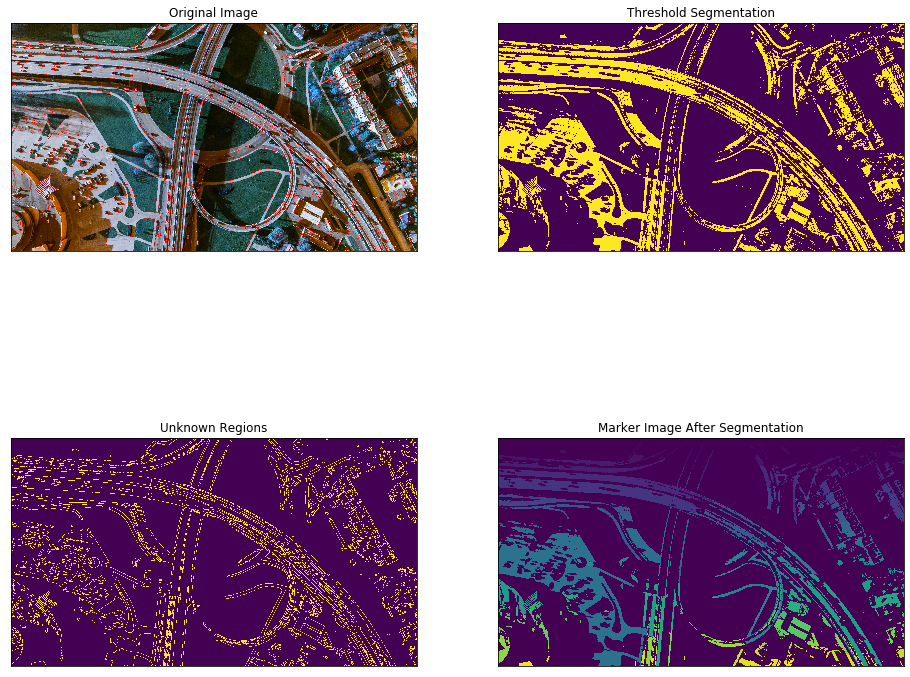

In [7]:
img1= cv2.imread("img/show2.jpeg")
res1= seg(img1)

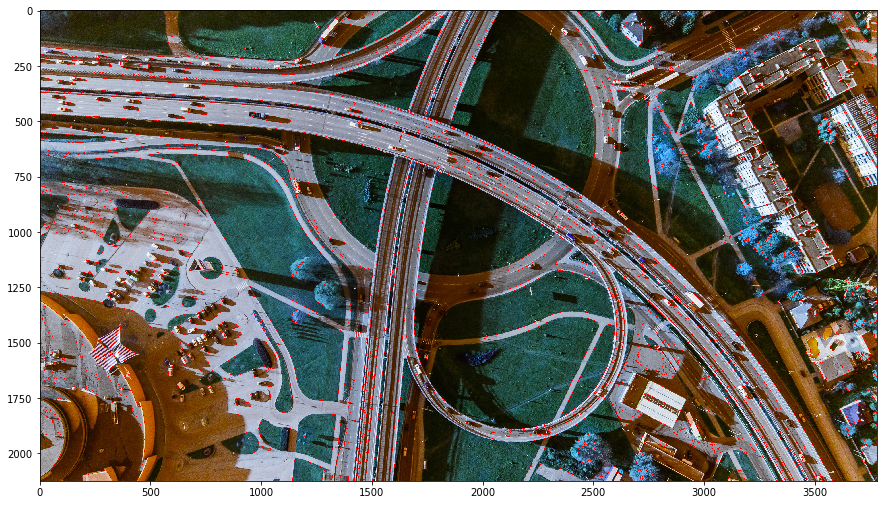

In [8]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.imshow(res1)

`Running Canny Edge Detection on result`

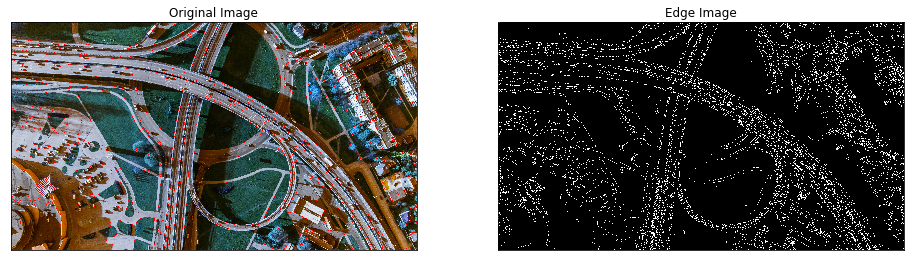

In [9]:
canny(res1)

`Rough codes not to consider`

In [70]:
# img= cv2.imread("img_rgb/B10A.jpg")
# gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# ret, thresh = cv2.threshold(gray,136,255,cv2.THRESH_BINARY)
# #plt.imshow(thresh)   
# # noise removal
# kernel = np.ones((3,3),np.uint8)
# opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# #plt.imshow(opening)

# # # sure background area
# sure_bg = cv2.dilate(opening,kernel,iterations=3)

# # # Finding sure foreground area
# dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
# #plt.imshow(dist_transform)
# ret, sure_fg = cv2.threshold(dist_transform,0.005*dist_transform.max(),255,0)
# #plt.imshow(sure_fg)

# # # Finding unknown region
# sure_fg = np.uint8(sure_fg)
# unknown = cv2.subtract(sure_bg,sure_fg)
# plt.imshow(unknown)

# # # Marker labelling
# ret, markers = cv2.connectedComponents(sure_fg)

# # # Add one to all labels so that sure background is not 0, but 1
# markers = markers+1

# # # Now, mark the region of unknown with zero
# markers[unknown==255] = 0

# markers = cv2.watershed(img,markers)
# img[markers == -1] = [255,0,0]
# #plt.imshow(markers)